In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

df = pd.read_csv('MPDataset_MPDS2019b.csv')
df['date'] = pd.to_datetime(df['edate'])
df['year'] = pd.DatetimeIndex(df['date']).year

df['left_right'] = df[['per401','per402','per407','per414','per505']].sum(axis=1) - df[['per403','per404','per405','per406','per409','per412','per413','per415','per416','per504']].sum(axis=1)
df['liberal_conservative'] = df[['per104','per109','per601','per603','per605','per608']].sum(axis=1) - df[['per105','per106','per107','per501','per503','per602','per604','per607','per705']].sum(axis=1)

df.head()

,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,...,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm,year,left_right,liberal_conservative
0,11,Sweden,0,0,17/09/1944,1944-09-17,11220,Communist Party of Sweden,SKP,20,...,9.60,1.9,1.900,0.0,1.900,2019b,JN1LZH,1944,0.000,-1.900
1,11,Sweden,0,0,17/09/1944,1944-09-17,11320,Social Democratic Labour Party,SAP,30,...,-37.80,3.3,2.200,33.4,5.600,2019b,CMR7F6,1944,-28.900,-13.400
2,11,Sweden,0,0,17/09/1944,1944-09-17,11420,People’s Party,FP,40,...,9.50,3.2,6.400,14.3,1.600,2019b,Z6OL6C,1944,-6.300,3.100
3,11,Sweden,0,0,17/09/1944,1944-09-17,11620,Right Party,NaN,60,...,28.00,1.8,22.800,10.6,0.000,2019b,YMKVN2,1944,15.700,7.000
4,11,Sweden,0,0,17/09/1944,1944-09-17,11810,Agrarian Party,NaN,80,...,23.81,0.0,19.048,0.0,4.762,2019b,U4SCRD,1944,19.048,4.762


In [2]:
table = pd.pivot_table(df[(df['countryname']=='United Kingdom')&(df['partyabbrev']=='Labour')],index='year',values=['left_right','liberal_conservative'])

table.head()

,left_right,liberal_conservative
year,,
1945,-26.6,-8.9
1950,-22.7,-6.2
1951,-23.7,-16.0
1955,-23.5,-21.8
1959,-13.5,-19.6


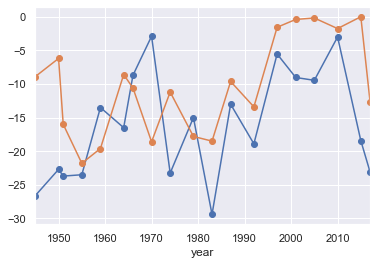

In [4]:
table['left_right'].plot(marker='o')
table['liberal_conservative'].plot(marker='o')

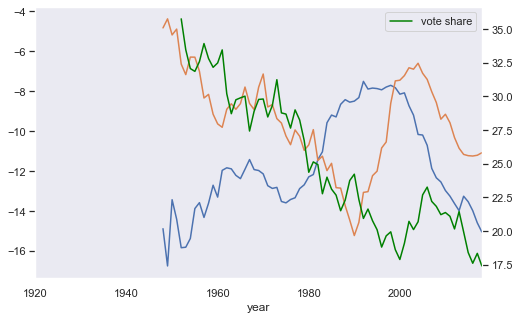

In [59]:
table = pd.pivot_table(df,index='year',columns='parfam',values=['left_right','liberal_conservative','pervote'],aggfunc='median')

fig, ax = plt.subplots(figsize=(8,5))

table['left_right'][30].rolling(10).mean().plot(label='left-right',ax=ax)
table['liberal_conservative'][30].rolling(10).mean().plot(label='liberal-conservative',ax=ax)

ax1 = ax.twinx()
table['pervote'][30].rolling(10).mean().plot(label='vote share',ax=ax1,color='green')
ax1.grid(False)
ax.grid(False)
plt.legend()